In [1]:
import os
import sys
import json
from datetime import datetime

import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor

In [2]:
# Add the `src` folder to the Python path
sys.path.append(os.path.join(os.path.abspath('..'), 'src'))
import utilities as util

# Add 'src/task1a' and 'src/task1c' folders to the Python path
sys.path.append(os.path.abspath("../src/task1a"))
sys.path.append(os.path.abspath("../src/task1c"))
import environment_gym as env_gym
import environment_gym_sh as env_gym_sh
import environment_gym_rs1 as env_gym_rs1
import environment_gym_rs2 as env_gym_rs2
import environment_gym_rs3 as env_gym_rs3

# Load the TensorBoard extension
# %load_ext tensorboard

## PPO Baseline Model

### Train Baseline Model

In [7]:
# Initialize and vectorize the environment
env = env_gym.TrafficEnvironment()
check_env(env, warn=True)
eval_env = Monitor(env_gym.TrafficEnvironment())

# Set up log directory
log_dir = "./logs/ppo_baseline_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env, 
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 100000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_baseline_model/PPO_1
Eval num_timesteps=1000, episode_reward=-17660.00 +/- 22736.04
Episode length: 1444.00 +/- 1515.74
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.44e+03  |
|    mean_reward     | -1.77e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-18536.00 +/- 19151.05
Episode length: 1502.40 +/- 1276.74
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.5e+03   |
|    mean_reward     | -1.85e+04 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 634       |
|    ep_rew_mean     | -4.51e+03 |
| time/      

In [35]:
# Start TensorBoard to monitor logs
# %tensorboard --logdir ./logs/ppo_baseline_model/ --port=5002

### Test Baseline Model

In [4]:
# Load the best baseline model
log_dir = "./logs/ppo_baseline_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 10000
file_name = 'ppo_baseline_best_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Baseline Model

Average reward of 10000 episodes is -6592.
Average timesteps of 10000 episodes is 1059.


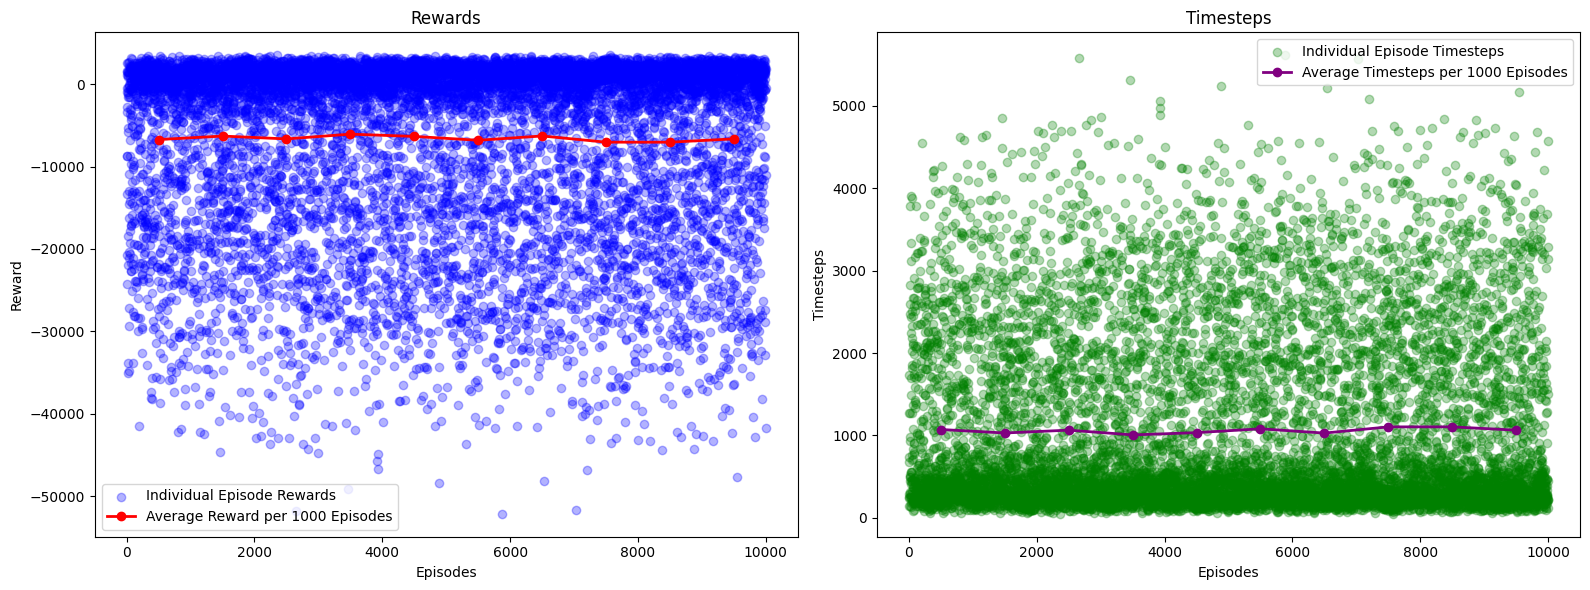

In [11]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=1000)

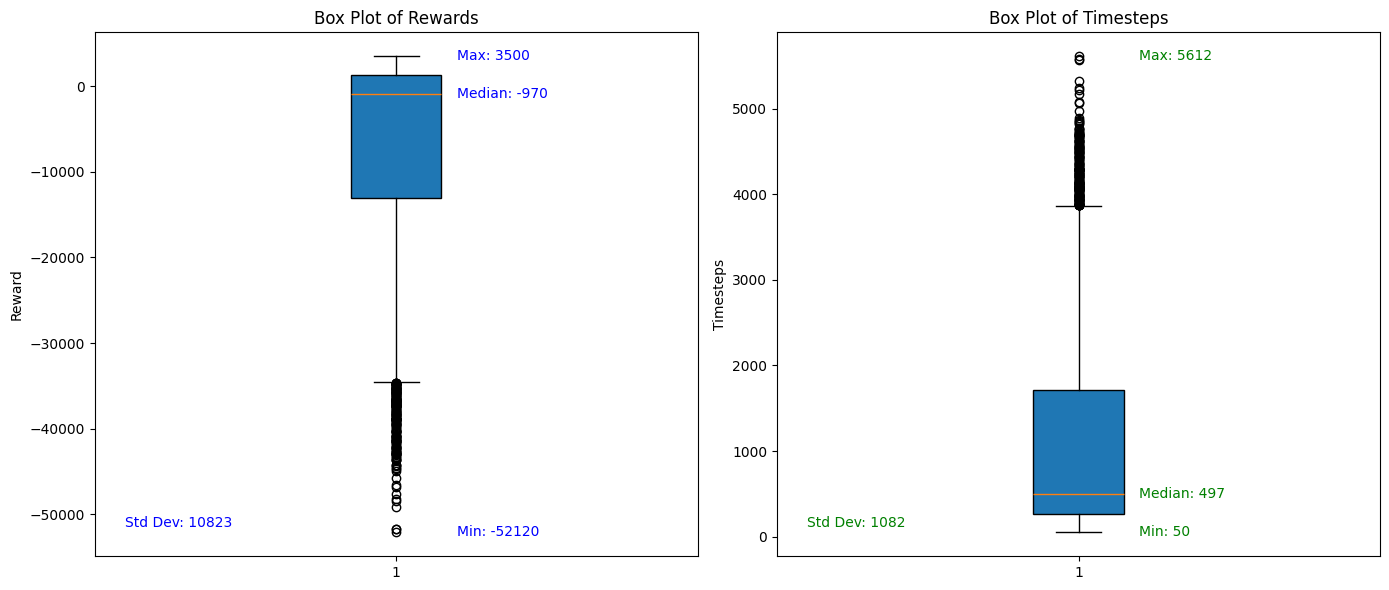

In [3]:
file_name = 'ppo_baseline_best_model_test_log.json'
util.plot_test_boxplots(json_file=file_name)

In [13]:
util.calculate_action_percentages(log_file=file_name)

Total actions across 10000 episodes: 10591751
Action -1: 0.0%
Action 0: 100.0%
Action 1: 0.0%


## Analysis of Clerance Rates

In [16]:
util.calculate_clearance_rate_percentages(log_file=file_name)

Total timesteps across 10000 episodes (including initial states): 10601751
Lane 1:
  77.7% of timesteps had a clearance rate less than 5
  88.2% of timesteps had a clearance rate less than 10
Lane 2:
  77.2% of timesteps had a clearance rate less than 5
  87.9% of timesteps had a clearance rate less than 10
Lane 3:
  77.0% of timesteps had a clearance rate less than 5
  87.6% of timesteps had a clearance rate less than 10
Lane 4:
  77.1% of timesteps had a clearance rate less than 5
  87.4% of timesteps had a clearance rate less than 10
Lane 5:
  77.4% of timesteps had a clearance rate less than 5
  87.3% of timesteps had a clearance rate less than 10


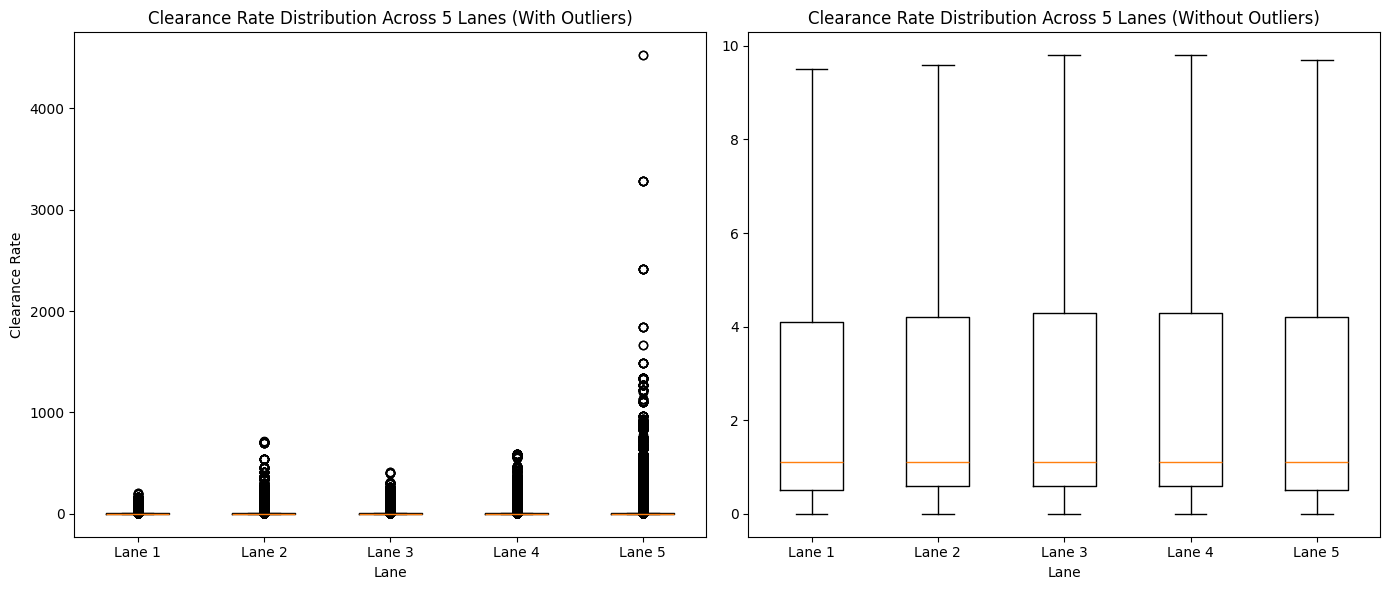

In [27]:
util.plot_clearance_rate_boxplots(log_file=file_name)

## Change State Representation

State = [distance index, current lane, clearance rates of 5 lanes, clearance rate index of 5 lanes, clearance rate difference to left lane, clearance rate difference to right lane, fastest lane, clerance rate difference to fastest lane]

### Train Model 1

In [ ]:
# Initialize and vectorize the environment
env = env_gym_sh.TrafficEnvironment()
check_env(env, warn=True)
env.reset()
eval_env = Monitor(env_gym_sh.TrafficEnvironment())

# Set up log directory
log_dir = "./logs/ppo_sh_baseline_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env, 
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_gs_baseline_model/PPO_1
Eval num_timesteps=1000, episode_reward=-9801.00 +/- 20672.41
Episode length: 939.20 +/- 1371.54
---------------------------------
| eval/              |          |
|    mean_ep_length  | 939      |
|    mean_reward     | -9.8e+03 |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=767.00 +/- 1031.68
Episode length: 247.20 +/- 74.26
---------------------------------
| eval/              |          |
|    mean_ep_length  | 247      |
|    mean_reward     | 767      |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 231  |
|    iterations      | 1    |
|    time_elapsed    | 8    |
|

### Test Model 1

In [5]:
# Load the best baseline model
log_dir = "./logs/ppo_sh_baseline_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym_sh.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 100
file_name = 'ppo_sh_baseline_best_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Model 1

Average reward of 100 episodes is -7852.
Average timesteps of 100 episodes is 1185.


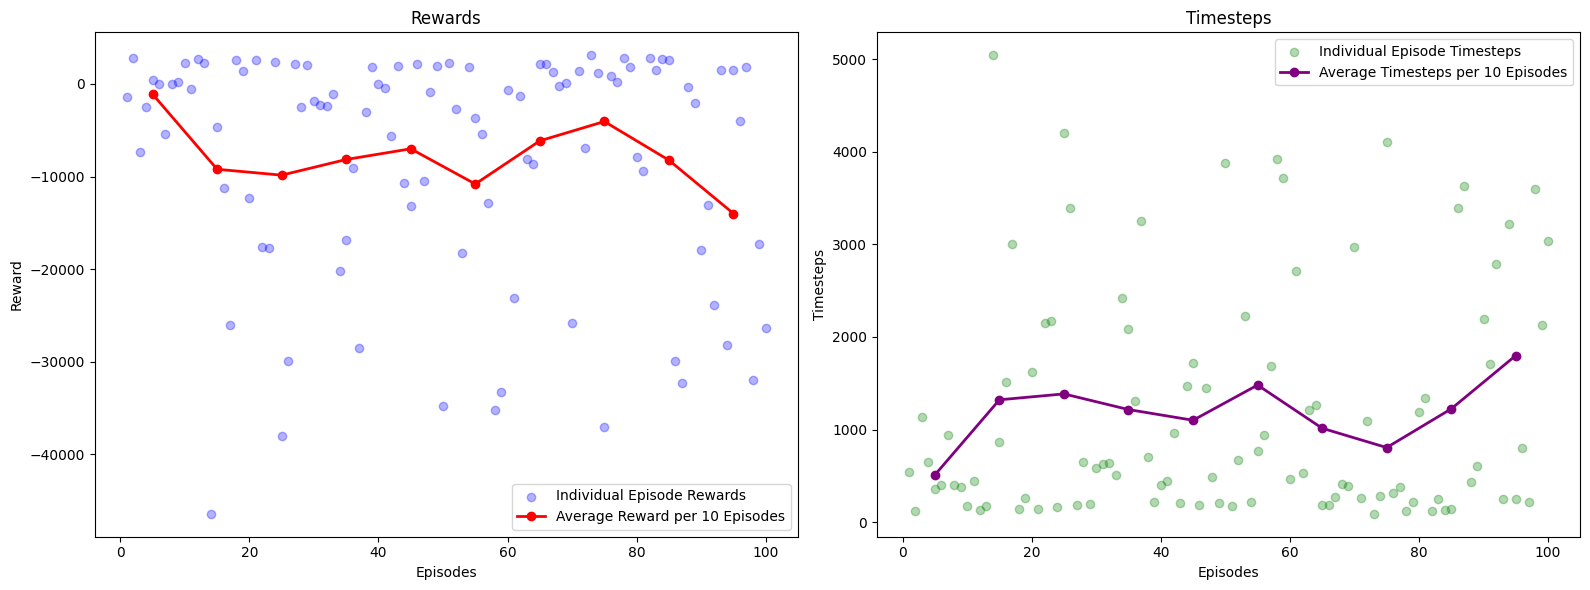

In [ ]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=10)

In [ ]:
util.calculate_action_percentages(log_file=file_name)

Total actions across 100 episodes: 118515
Action -1: 0.0%
Action 0: 100.0%
Action 1: 0.0%


In [ ]:
util.calculate_clearance_rate_percentages(log_file=file_name)

Total timesteps across 100 episodes (including initial states): 118615
Lane 1:
  100.0% of timesteps had a clearance rate less than 5
  100.0% of timesteps had a clearance rate less than 10
Lane 2:
  100.0% of timesteps had a clearance rate less than 5
  100.0% of timesteps had a clearance rate less than 10
Lane 3:
  97.4% of timesteps had a clearance rate less than 5
  98.9% of timesteps had a clearance rate less than 10
Lane 4:
  100.0% of timesteps had a clearance rate less than 5
  100.0% of timesteps had a clearance rate less than 10
Lane 5:
  92.5% of timesteps had a clearance rate less than 5
  95.7% of timesteps had a clearance rate less than 10


## Reward Shaping Method 1

Penality applied to not switching to faster adjacent lanes for 3 consecutive timesteps

### Train PPO Model 2

In [ ]:
# Initialize and vectorize the environment
env = env_gym_rs1.TrafficEnvironment(reward_shaping_flag=True)
check_env(env, warn=True)
env.reset()
eval_env = Monitor(env_gym_rs1.TrafficEnvironment(reward_shaping_flag=False))

# Set up log directory
log_dir = "./logs/ppo_rs1_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env, 
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_rs_model/PPO_2
Eval num_timesteps=1000, episode_reward=-22292.00 +/- 23646.68
Episode length: 1753.00 +/- 1576.53
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.75e+03  |
|    mean_reward     | -2.23e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-11964.00 +/- 15882.62
Episode length: 1064.40 +/- 1058.77
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.06e+03 |
|    mean_reward     | -1.2e+04 |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 626       |
|    ep_rew_mean     | -8.62e+03 |
| ti

In [ ]:
# Start TensorBoard to monitor logs
# %tensorboard --logdir ./logs/ppo_rs1_model/ --port=5000

### Test Model 2

In [ ]:
# Load the best baseline model
log_dir = "./logs/ppo_rs1_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 1000
file_name = 'ppo_rs1_best_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Model 2

Average reward of 1000 episodes is -6790.
Average timesteps of 1000 episodes is 1068.


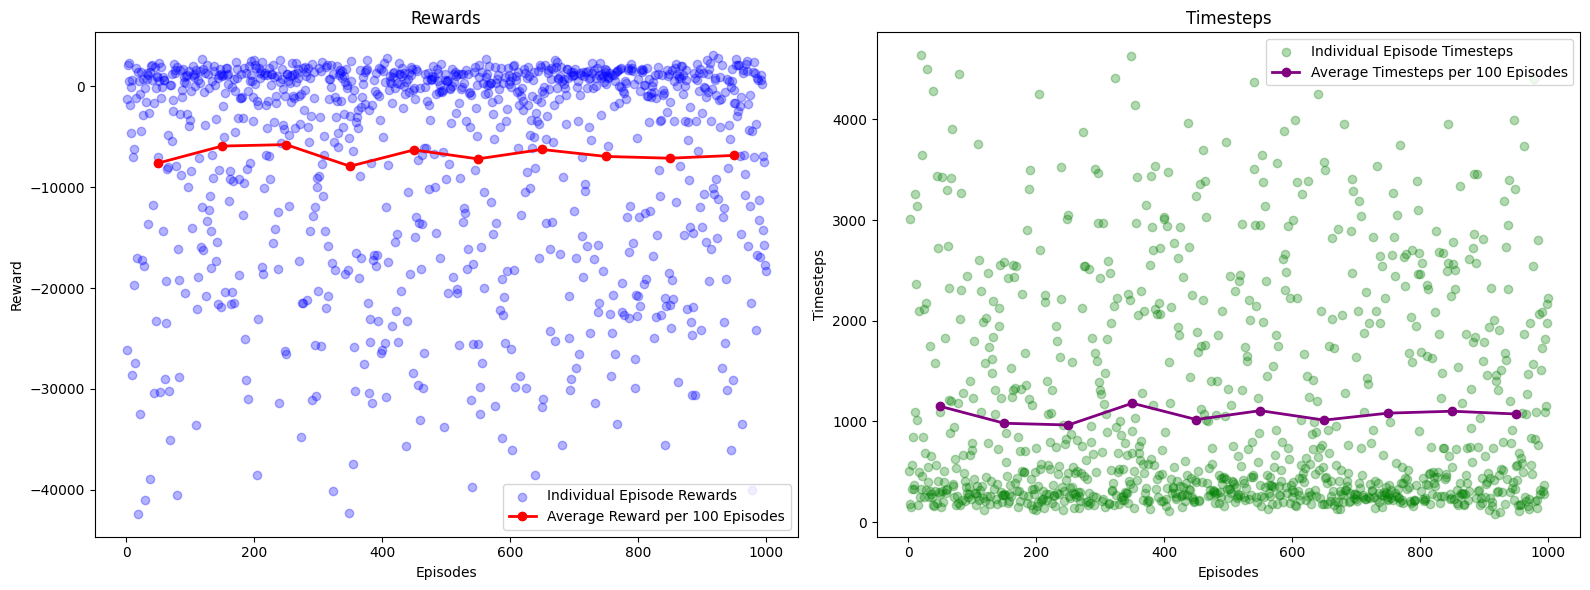

In [ ]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=100)

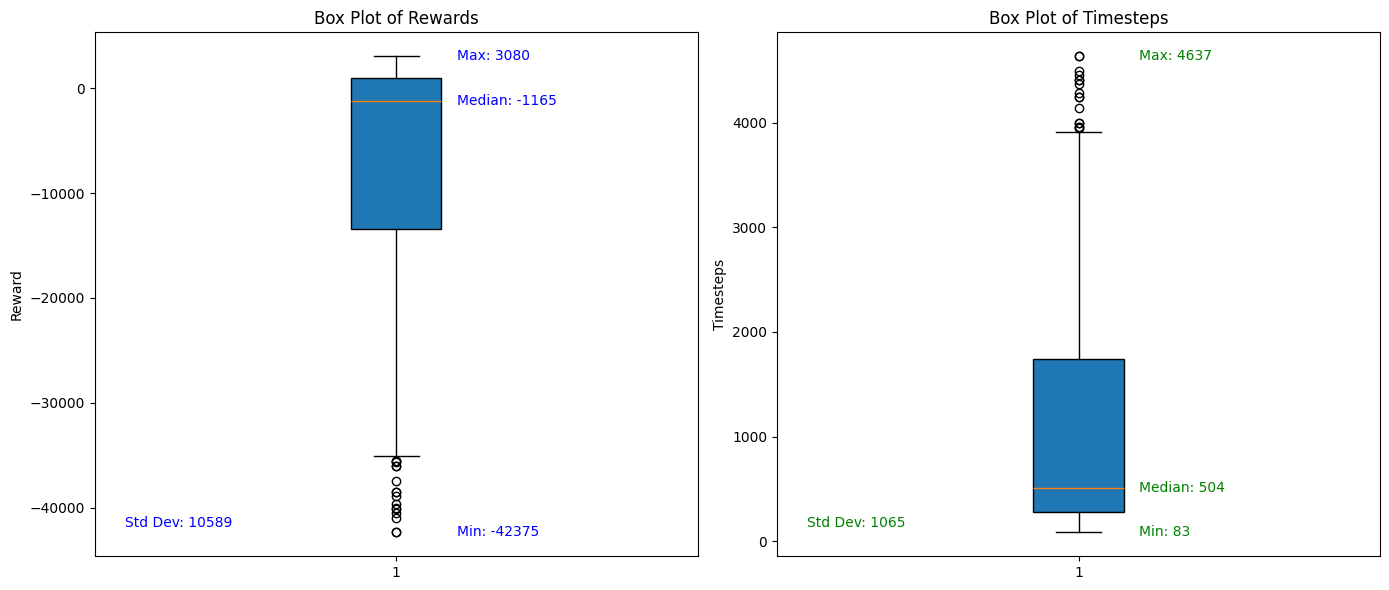

In [ ]:
util.plot_test_boxplots(json_file=file_name)

In [ ]:
util.calculate_action_percentages(log_file=file_name)
print("")
util.calculate_clearance_rate_percentages(log_file=file_name)

Total actions across 1000 episodes: 1067676
Action -1: 0.0%
Action 0: 97.9%
Action 1: 2.1%

Total timesteps across 1000 episodes (including initial states): 1068676
Lane 1:
  77.0% of timesteps had a clearance rate less than 5
  87.7% of timesteps had a clearance rate less than 10
Lane 2:
  76.5% of timesteps had a clearance rate less than 5
  87.5% of timesteps had a clearance rate less than 10
Lane 3:
  76.4% of timesteps had a clearance rate less than 5
  87.2% of timesteps had a clearance rate less than 10
Lane 4:
  76.6% of timesteps had a clearance rate less than 5
  87.0% of timesteps had a clearance rate less than 10
Lane 5:
  77.0% of timesteps had a clearance rate less than 5
  87.2% of timesteps had a clearance rate less than 10


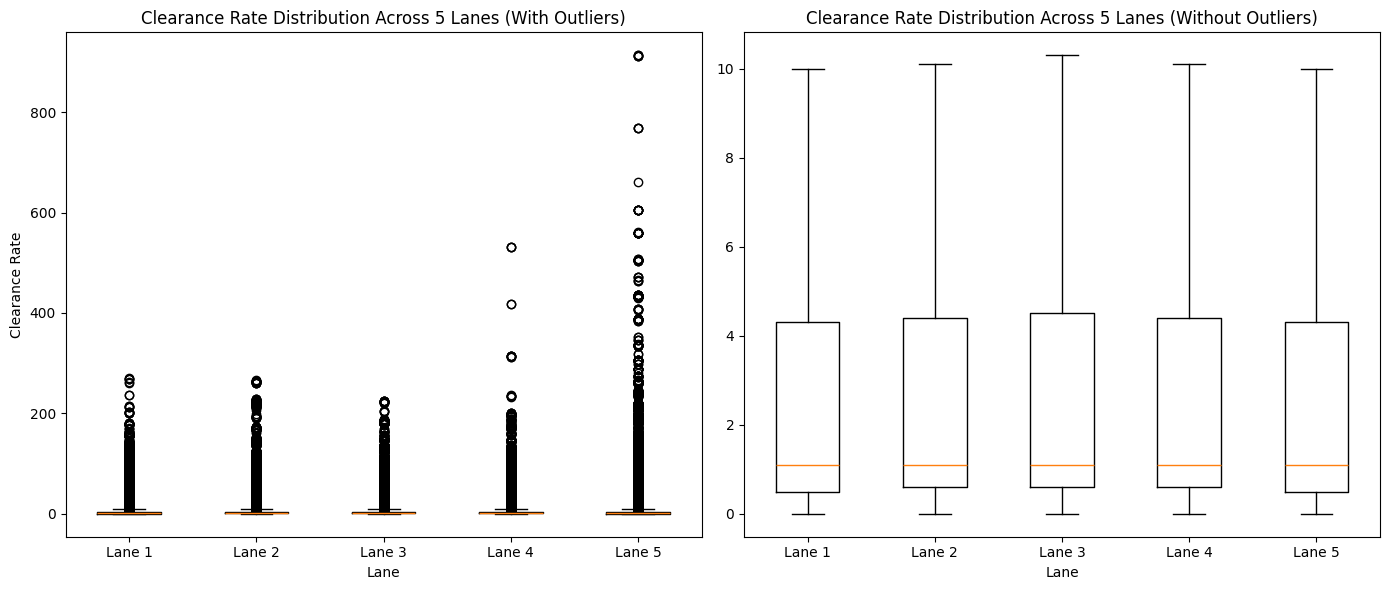

In [ ]:
util.plot_clearance_rate_boxplots(log_file=file_name)

### Train Model 3 (Fine-tune Model 2)

In [ ]:
# Initialize and vectorize the environment
env = env_gym_rs1.TrafficEnvironment(reward_shaping_flag=True)
check_env(env, warn=True)
env.reset()
eval_env = Monitor(env_gym_rs1.TrafficEnvironment(reward_shaping_flag=False))

# Set up log directory
log_dir = "./logs/ppo_rs1_finetune_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env,
            learning_rate=0.0005,
            ent_coef=0.01,
            gamma = 0.98,
            n_epochs=20,
            clip_range=0.3,
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 100000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_rs_finetune_model/PPO_1


Eval num_timesteps=1000, episode_reward=-4554.00 +/- 7374.53
Episode length: 855.40 +/- 737.45
----------------------------------
| eval/              |           |
|    mean_ep_length  | 855       |
|    mean_reward     | -4.55e+03 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-10444.00 +/- 13759.56
Episode length: 1444.40 +/- 1375.96
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.44e+03  |
|    mean_reward     | -1.04e+04 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
-----------------------------
| time/              |      |
|    fps             | 272  |
|    iterations      | 1    |
|    time_elapsed    | 7    |
|    total_timesteps | 2048 |
-----------------------------
Eval num_timesteps=3000, episode_reward=-16631.00 +/- 19677.62
Episode length: 1375.

### Test Model 3

In [ ]:
# Load the best baseline model
log_dir = "./logs/ppo_rs1_finetune_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 100
file_name = 'ppo_rs1_finetune_best_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Model 3

Average reward of 100 episodes is -6159.
Average timesteps of 100 episodes is 1016.


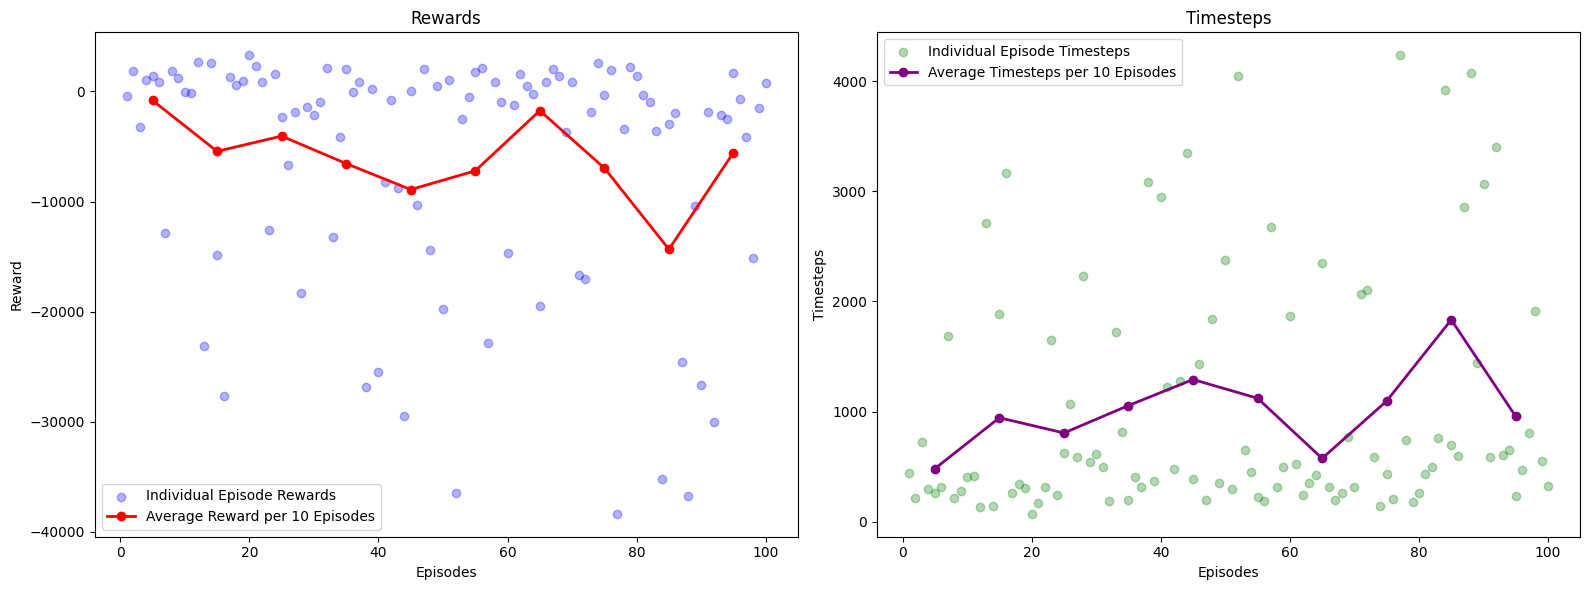

In [ ]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=10)

Total actions across 100 episodes: 101588
Action -1: 0.0%
Action 0: 100.0%
Action 1: 0.0%

Total timesteps across 100 episodes (including initial states): 101688
Lane 1:
  75.1% of timesteps had a clearance rate less than 5
  87.1% of timesteps had a clearance rate less than 10
Lane 2:
  74.6% of timesteps had a clearance rate less than 5
  87.1% of timesteps had a clearance rate less than 10
Lane 3:
  74.6% of timesteps had a clearance rate less than 5
  86.0% of timesteps had a clearance rate less than 10
Lane 4:
  74.7% of timesteps had a clearance rate less than 5
  86.1% of timesteps had a clearance rate less than 10
Lane 5:
  74.9% of timesteps had a clearance rate less than 5
  86.3% of timesteps had a clearance rate less than 10


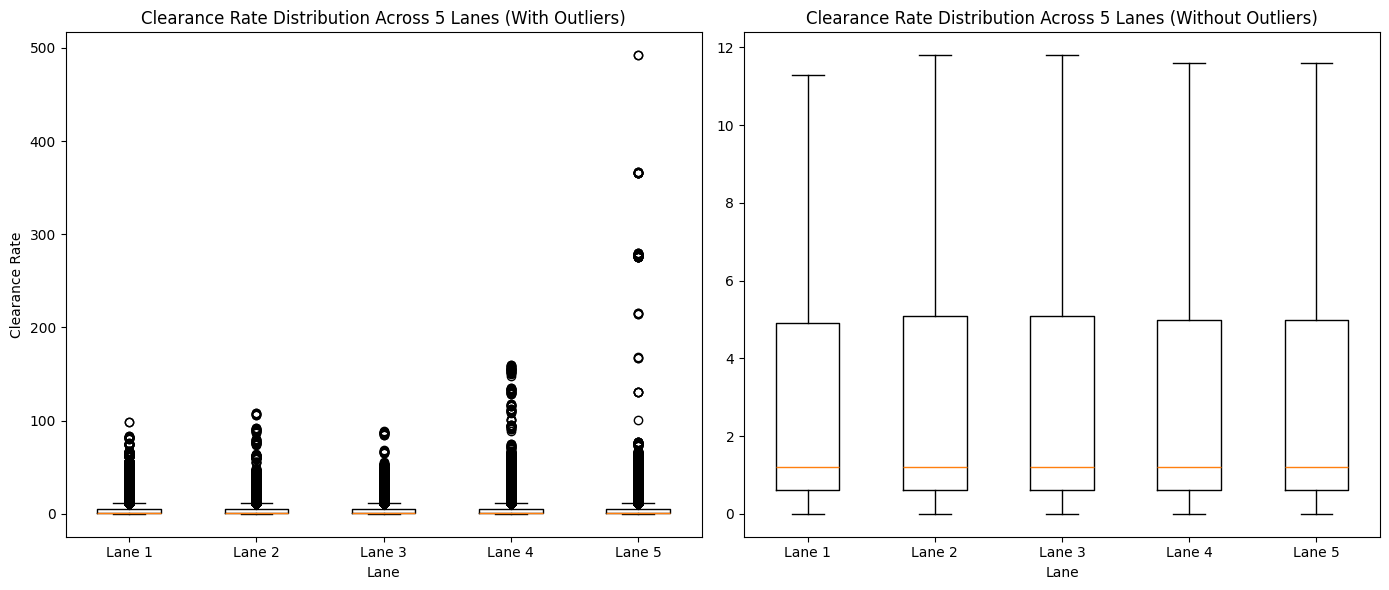

In [ ]:
util.calculate_action_percentages(log_file=file_name)
print("")
util.calculate_clearance_rate_percentages(log_file=file_name)
util.plot_clearance_rate_boxplots(log_file=file_name)

## Reward Shaping Method 2

- Apply reward (150 * new clearance rate) to good lane switch
- Apply penalty to impossible lane switch (switch left when lane = 1 and switch right when lane = 5)

### Train Model 4

In [ ]:
# Initialize and vectorize the environment
env = env_gym_rs2.TrafficEnvironment(reward_shaping_flag=True)
check_env(env, warn=True)
env.reset()
eval_env = Monitor(env_gym_rs2.TrafficEnvironment(reward_shaping_flag=False))

# Set up log directory
log_dir = "./logs/ppo_rs2_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env, 
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_rs3_model/PPO_9


Eval num_timesteps=1000, episode_reward=-13569.00 +/- 10717.74
Episode length: 1756.60 +/- 1071.42
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.76e+03  |
|    mean_reward     | -1.36e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-11495.00 +/- 15170.76
Episode length: 1549.20 +/- 1516.59
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.55e+03  |
|    mean_reward     | -1.15e+04 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 634      |
|    ep_rew_mean     | 3.71e+04 |
| time/              |          |
|    fps             | 169      |
|    iterations      | 1        |
|    time_elapsed    | 12     

### Test Model 4

In [ ]:
# Load the best baseline model
log_dir = "./logs/ppo_rs2_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 1000
file_name = 'ppo_rs2_best_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Model 4

Average reward of 1000 episodes is -4903.
Average timesteps of 1000 episodes is 1042.


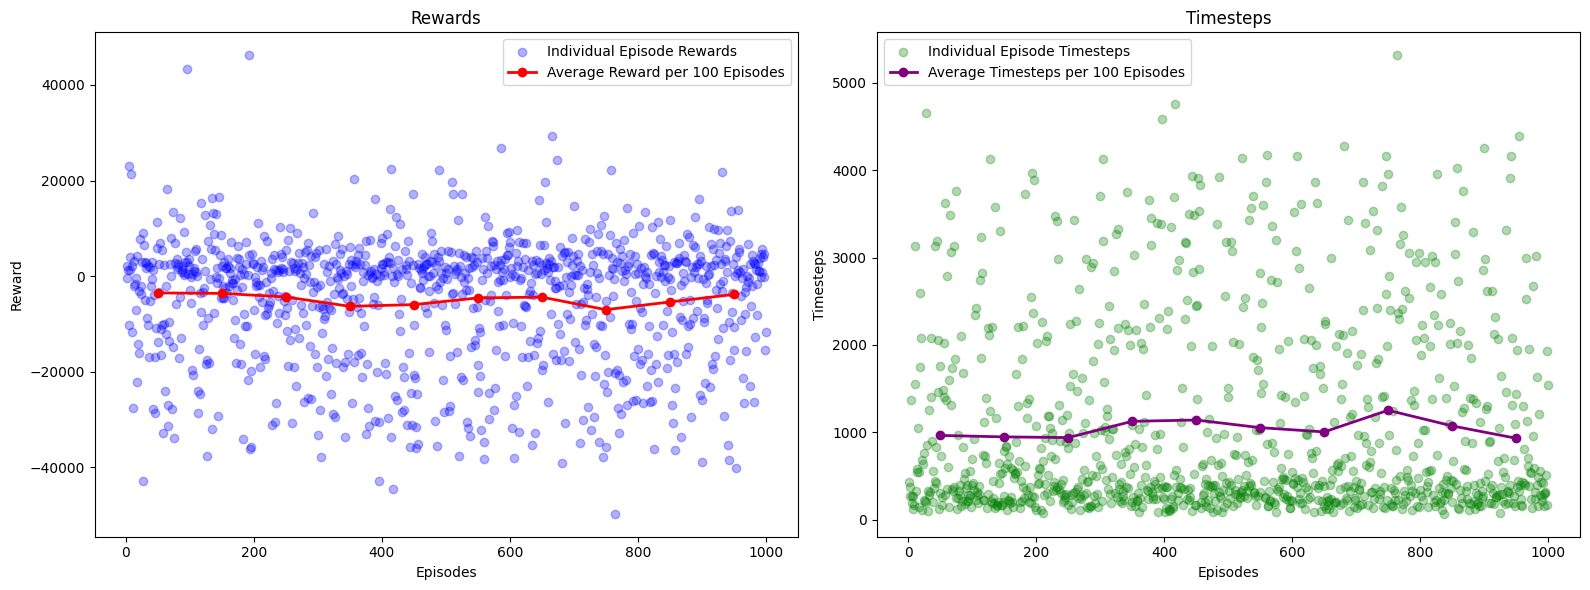

In [ ]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=100)

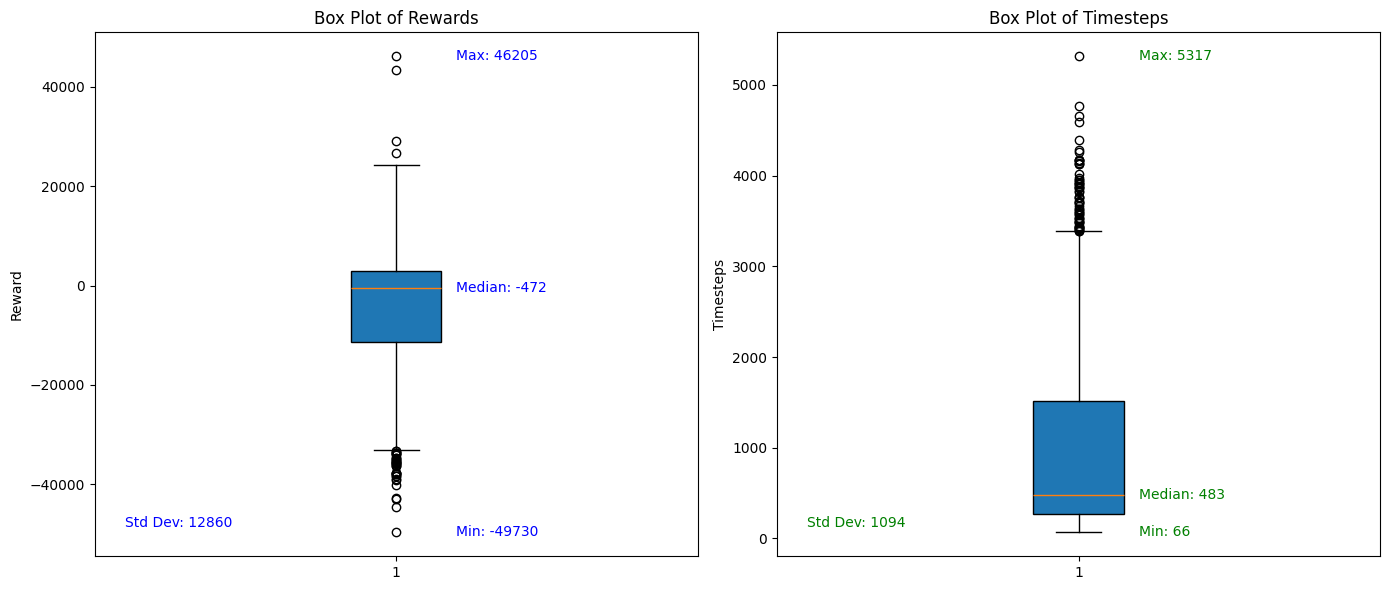

In [ ]:
util.plot_test_boxplots(json_file=file_name)

In [ ]:
util.calculate_action_percentages(log_file=file_name)
print("")
util.calculate_clearance_rate_percentages(log_file=file_name)

Total actions across 1000 episodes: 1042499
Action -1: 0.0%
Action 0: 98.0%
Action 1: 1.9%

Total timesteps across 1000 episodes (including initial states): 1043499
Lane 1:
  77.4% of timesteps had a clearance rate less than 5
  87.9% of timesteps had a clearance rate less than 10
Lane 2:
  77.0% of timesteps had a clearance rate less than 5
  87.6% of timesteps had a clearance rate less than 10
Lane 3:
  76.8% of timesteps had a clearance rate less than 5
  87.2% of timesteps had a clearance rate less than 10
Lane 4:
  76.8% of timesteps had a clearance rate less than 5
  87.0% of timesteps had a clearance rate less than 10
Lane 5:
  77.2% of timesteps had a clearance rate less than 5
  87.2% of timesteps had a clearance rate less than 10


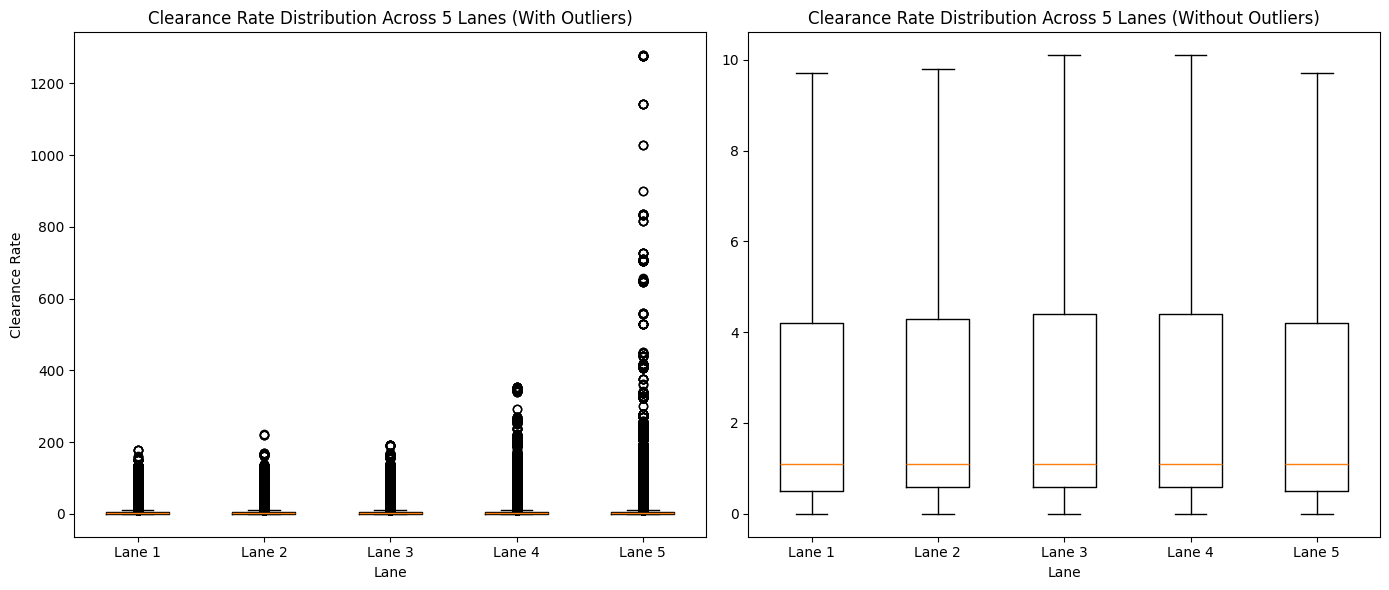

In [ ]:
util.plot_clearance_rate_boxplots(log_file=file_name)

### Train Model 5 (Fine-tune Model 4)

In [ ]:
# Initialize and vectorize the environment
env = env_gym_rs2.TrafficEnvironment(reward_shaping_flag=True)
check_env(env, warn=True)
eval_env = Monitor(env_gym_rs2.TrafficEnvironment(reward_shaping_flag=False))

# Set up log directory
log_dir = "./logs/ppo_rs2_finetune_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env, 
            learning_rate = 0.0005,
            ent_coef = 0.015,
            gamma = 0.95,
            n_epochs = 20,
            n_steps = 4096,
            clip_range = 0.3,
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 100000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_rs3_finetune_model/PPO_3
Eval num_timesteps=1000, episode_reward=-31423.00 +/- 27865.61
Episode length: 1559.80 +/- 1034.14
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.56e+03  |
|    mean_reward     | -3.14e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-35909.00 +/- 21942.81
Episode length: 1809.80 +/- 968.70
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.81e+03  |
|    mean_reward     | -3.59e+04 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
Eval num_timesteps=3000, episode_reward=-36144.00 +/- 20470.69
Episode length: 1738.60 +/- 832.02
----------------------------------
| eval/          

### Test Model 5

In [ ]:
# Load the best baseline model
log_dir = "./logs/ppo_rs2_finetune_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 1000
file_name = 'ppo_rs3_finetune_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Model 5

Average reward of 1000 episodes is -16901.
Average timesteps of 1000 episodes is 994.


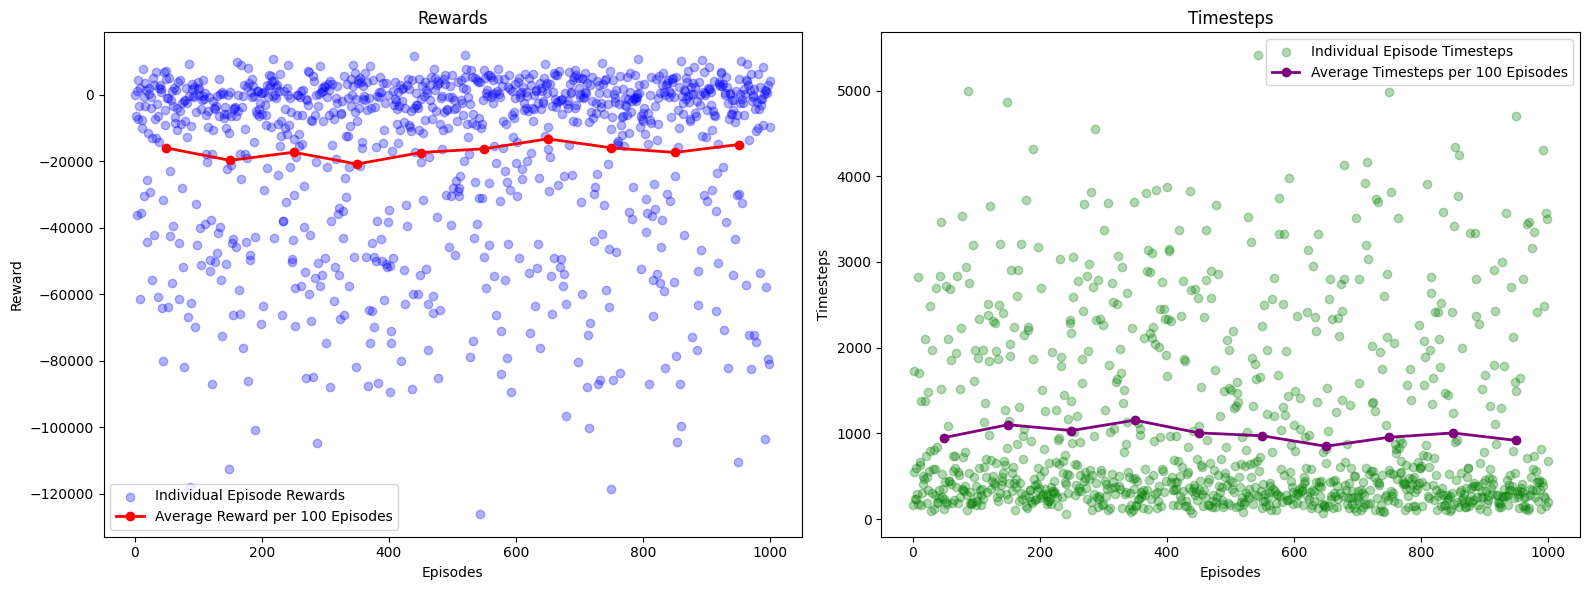

In [ ]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=100)

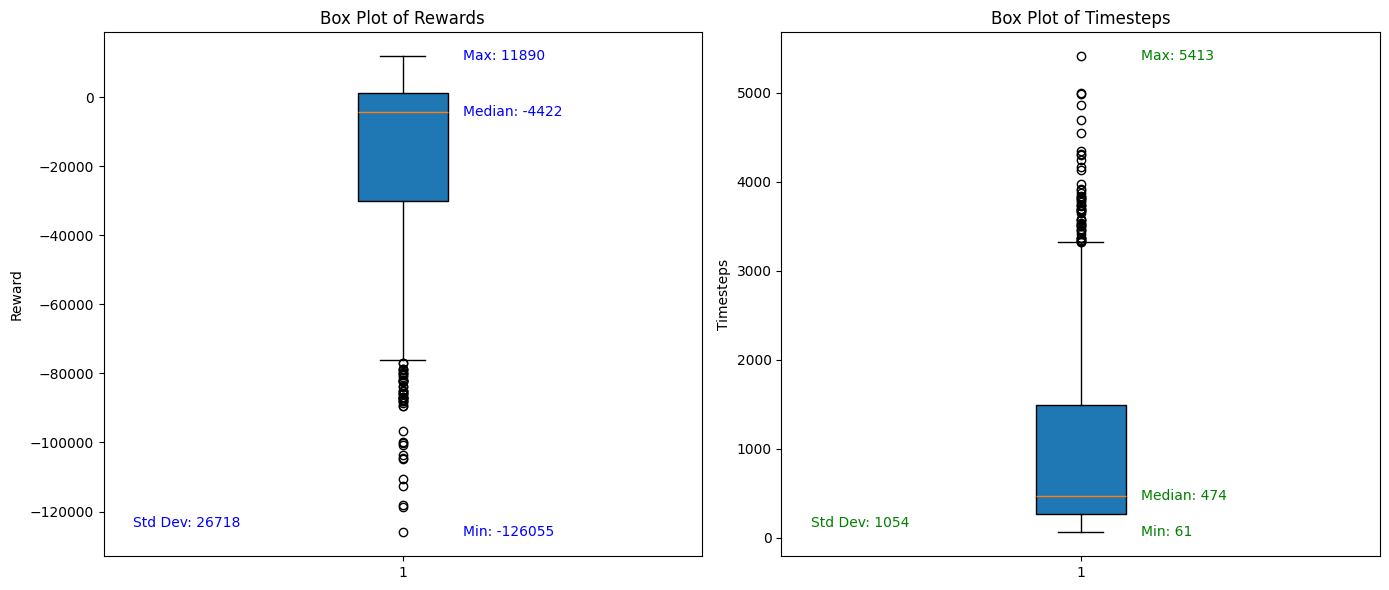

In [ ]:
util.plot_test_boxplots(json_file=file_name)

In [ ]:
util.calculate_action_percentages(log_file=file_name)

Total actions across 1000 episodes: 994012
Action -1: 0.0%
Action 0: 0.0%
Action 1: 100.0%


## Reward Shaping Method 3

- Remove lane swtich penalty
- Apply reward to good lane swtich
- Time penalty is changed from "distance covered - 10" to "2 * distance - 10"

### Train Model 6

In [ ]:
# Initialize and vectorize the environment
env = env_gym_rs3.TrafficEnvironment(reward_shaping_flag=True)
check_env(env, warn=True)
eval_env = Monitor(env_gym_rs3.TrafficEnvironment(reward_shaping_flag=False))

# Set up log directory
log_dir = "./logs/ppo_rs3_baseline_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env,
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_rs4_baseline_model/PPO_4
Eval num_timesteps=1000, episode_reward=-12125.00 +/- 12262.36
Episode length: 1604.20 +/- 1223.08
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.6e+03   |
|    mean_reward     | -1.21e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-1784.00 +/- 3425.38
Episode length: 574.00 +/- 336.64
----------------------------------
| eval/              |           |
|    mean_ep_length  | 574       |
|    mean_reward     | -1.78e+03 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.78e+03  |
|    ep_rew_mean     | -9.

### Test Model 6

In [ ]:
# Load the best baseline model
log_dir = "./logs/ppo_rs3_baseline_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 1000
file_name = 'ppo_rs3_best_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Model 6

Average reward of 1000 episodes is -12590.
Average timesteps of 1000 episodes is 1110.


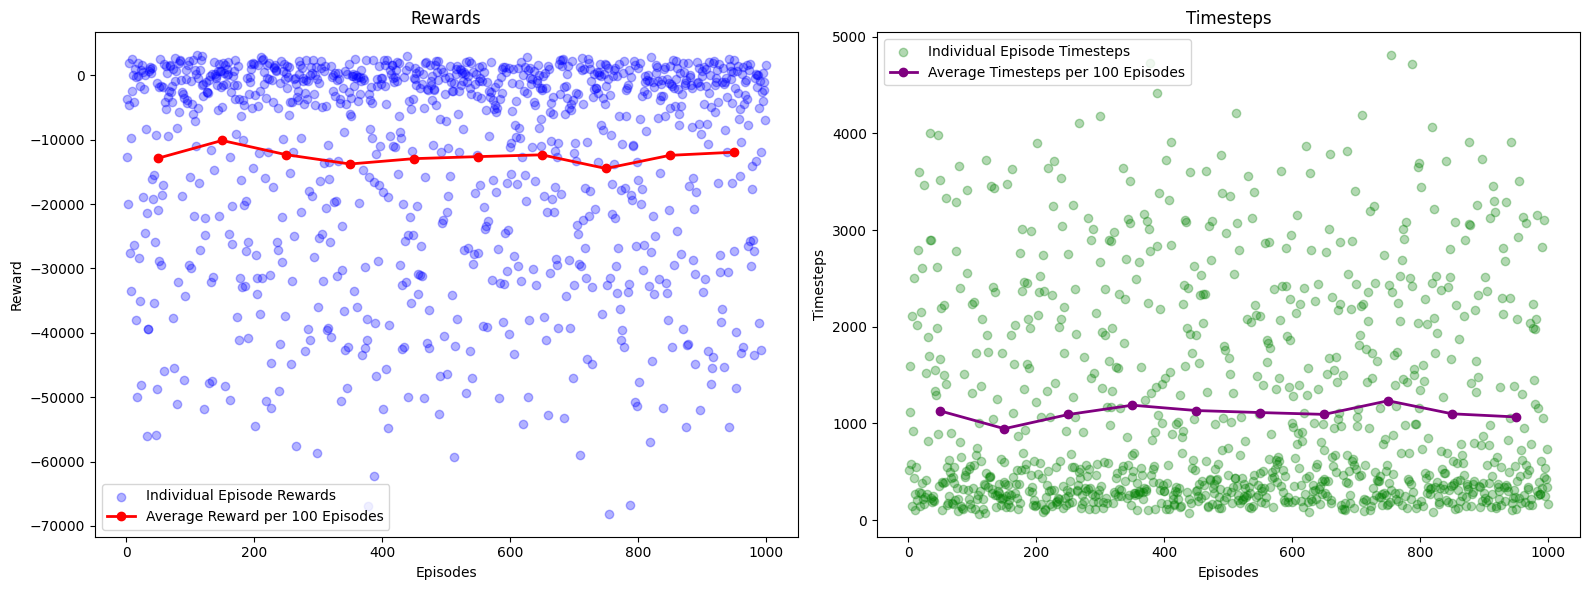

In [ ]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=100)

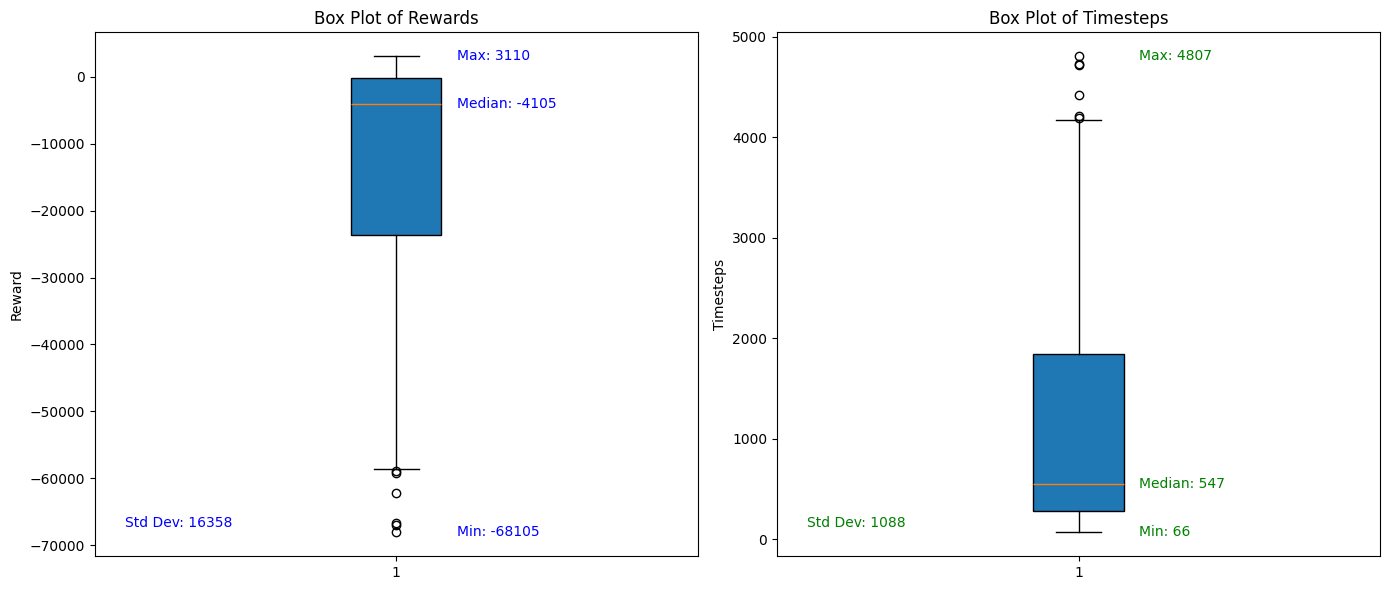

In [ ]:
util.plot_test_boxplots(json_file=file_name)

In [ ]:
util.calculate_action_percentages(log_file=file_name)
print("")
util.calculate_clearance_rate_percentages(log_file=file_name)

Total actions across 1000 episodes: 1109869
Action -1: 0.0%
Action 0: 0.0%
Action 1: 100.0%

Total timesteps across 1000 episodes (including initial states): 1110869
Lane 1:
  78.6% of timesteps had a clearance rate less than 5
  88.1% of timesteps had a clearance rate less than 10
Lane 2:
  78.4% of timesteps had a clearance rate less than 5
  88.2% of timesteps had a clearance rate less than 10
Lane 3:
  78.4% of timesteps had a clearance rate less than 5
  88.4% of timesteps had a clearance rate less than 10
Lane 4:
  78.7% of timesteps had a clearance rate less than 5
  88.8% of timesteps had a clearance rate less than 10
Lane 5:
  79.1% of timesteps had a clearance rate less than 5
  89.0% of timesteps had a clearance rate less than 10


### Train Model 7 (Fine-tune Model 6)

In [ ]:
# Initialize and vectorize the environment
env = env_gym_rs3.TrafficEnvironment(reward_shaping_flag=True)
check_env(env, warn=True)
eval_env = Monitor(env_gym_rs3.TrafficEnvironment(reward_shaping_flag=False))

# Set up log directory
log_dir = "./logs/ppo_rs3_finetune_model/"
os.makedirs(log_dir + "best_model/", exist_ok=True)
os.makedirs(log_dir + "final_model/", exist_ok=True)

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO(policy = "MlpPolicy",
            device = "cpu",    # PPO is meant to be run primarily on the CPU 
            env = env,
            learning_rate=0.0005,
            ent_coef=0.1,
            clip_range=0.3,
            n_steps=4096,
            batch_size=256,
            gamma=0.3,
            verbose = 1,
            tensorboard_log = log_dir
           )

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path=log_dir + "best_model/",
    log_path=log_dir + "results/",
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=False,
    render=False
)

# Train the PPO model
total_timesteps = 100000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Save the final model
final_model_path = log_dir + "final_model"
model.save(final_model_path)
print(f"Final model saved to {final_model_path}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo_rs4_finetune_model/PPO_4
Eval num_timesteps=1000, episode_reward=-13321.00 +/- 15973.50
Episode length: 1305.60 +/- 1197.20
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.31e+03  |
|    mean_reward     | -1.33e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-2744.00 +/- 3895.73
Episode length: 510.60 +/- 288.81
----------------------------------
| eval/              |           |
|    mean_ep_length  | 511       |
|    mean_reward     | -2.74e+03 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
New best mean reward!
Eval num_timesteps=3000, episode_reward=-15065.00 +/- 17470.41
Episode length: 1434.40 +/- 1305.64
--------------------------------

In [ ]:
# Start TensorBoard to monitor logs
# %tensorboard --logdir ./logs/ppo_rs3_finetune_model --port=5005

### Test Model 7

In [ ]:
# Load the best baseline model
log_dir = "./logs/ppo_rs3_finetune_model/"
model_path = log_dir + 'best_model/best_model.zip'
model = PPO.load(model_path)

# Create test environment
env_test = env_gym.TrafficEnvironment()

In [ ]:
# Test the model
num_episodes = 1000
file_name = 'ppo_rs3_finetune_model_test_log.json'
rewards, timesteps = util.test_model(model=model, env=env_test, num_episodes=num_episodes, output_file=file_name)

### Analysis of Model 7

Average reward of 1000 episodes is -11486.
Average timesteps of 1000 episodes is 1037.


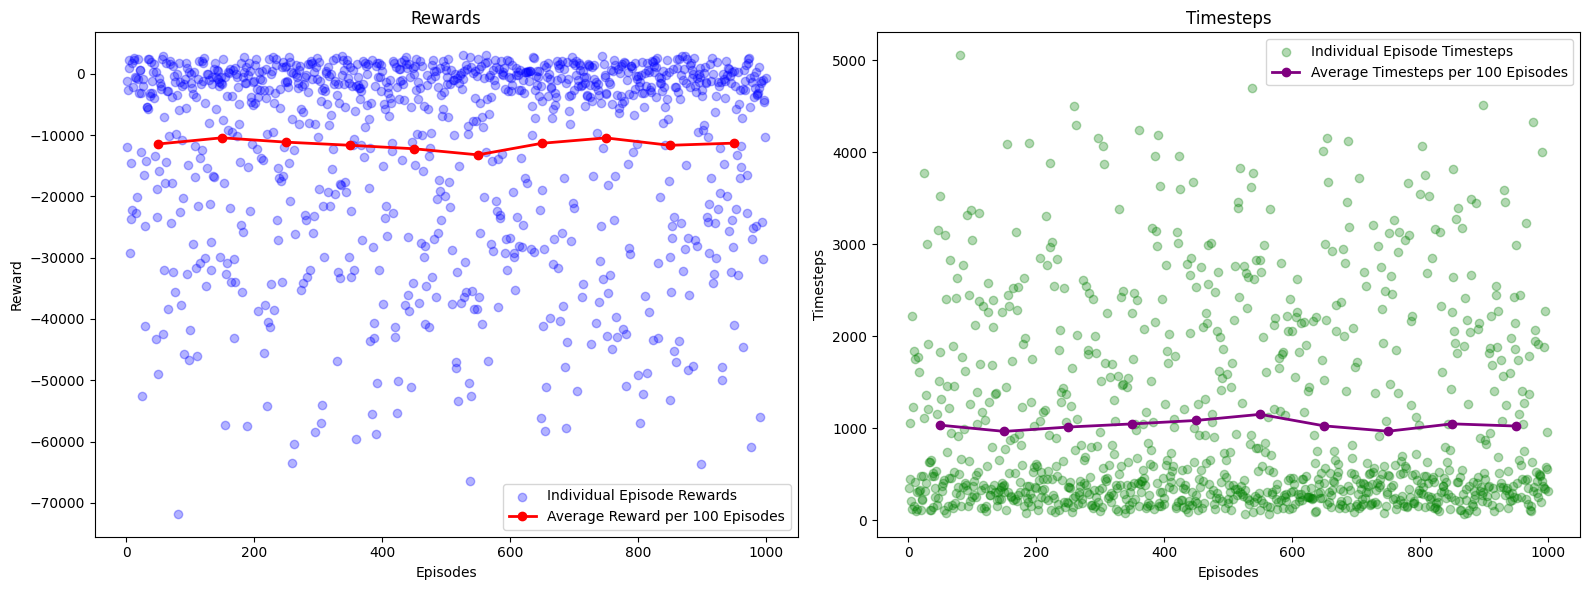

In [ ]:
util.plot_test_dotplots(rewards=rewards, timesteps=timesteps, interval=100)

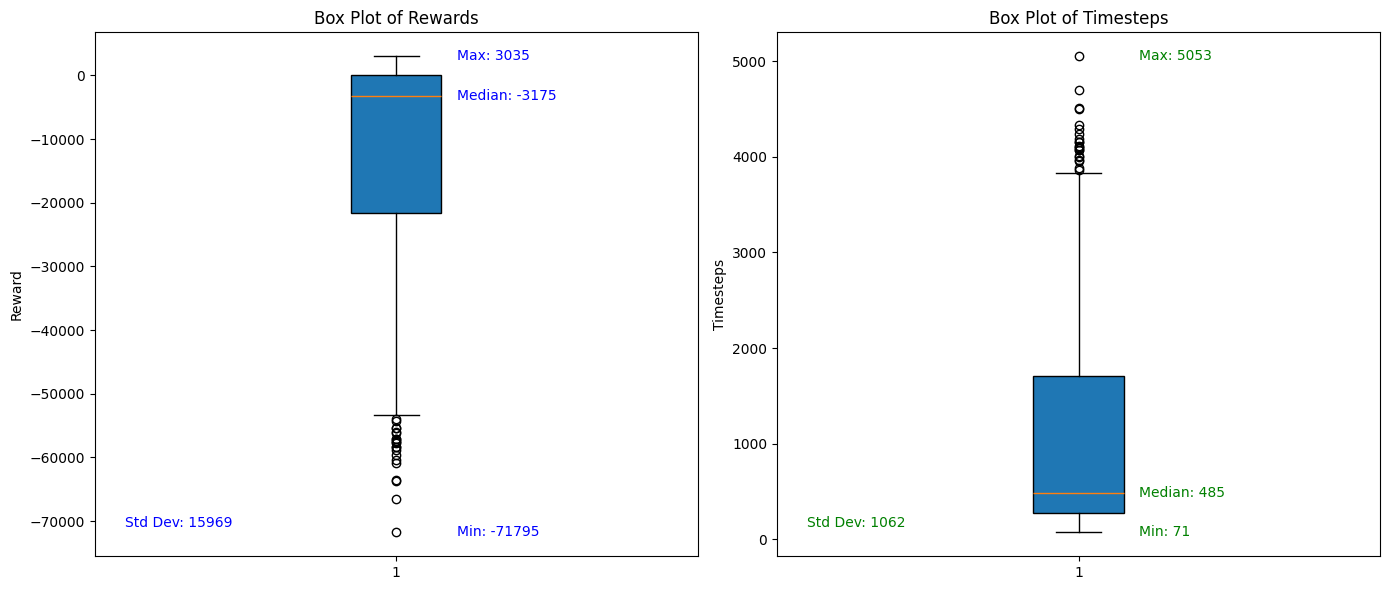

In [ ]:
util.plot_test_boxplots(json_file=file_name)

In [ ]:
util.calculate_action_percentages(log_file=file_name)
print("")
util.calculate_clearance_rate_percentages(log_file=file_name)

Total actions across 1000 episodes: 1036509
Action -1: 0.2%
Action 0: 0.0%
Action 1: 99.8%

Total timesteps across 1000 episodes (including initial states): 1037509
Lane 1:
  77.2% of timesteps had a clearance rate less than 5
  87.5% of timesteps had a clearance rate less than 10
Lane 2:
  76.8% of timesteps had a clearance rate less than 5
  87.4% of timesteps had a clearance rate less than 10
Lane 3:
  76.7% of timesteps had a clearance rate less than 5
  87.4% of timesteps had a clearance rate less than 10
Lane 4:
  76.8% of timesteps had a clearance rate less than 5
  87.7% of timesteps had a clearance rate less than 10
Lane 5:
  77.2% of timesteps had a clearance rate less than 5
  88.0% of timesteps had a clearance rate less than 10
